In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

df = pd.read_csv('iris.csv.txt', sep=',', header=0)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#se genera el arreglo con el nombre de las figuras.

features=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
label = 'species'

In [21]:
#cambia los valores a numeros
sle = LabelEncoder()
df['sle'] = sle.fit_transform(df[label])

#muestra los primeros 5 registros
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sle
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [22]:
#capturamos los datos
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df.sle, test_size=0.20, random_state=0)

In [23]:
xtrain.shape #120, 4 que es = 0.80

(120, 4)

In [24]:
xtest.shape #30, 4 = 0.20

(30, 4)

In [25]:
print(len(ytrain))

print(len(ytest))

120
30


In [43]:
svm = SVC(probability=True)

modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

In [45]:
prediccion_lista = prediccion.tolist()
ytest_lista = ytest.tolist()

#ytest = prediccion (tiene que ser lo mas aproximado)
i = 0
for p in prediccion_lista:
    print(p, '->', ytest_lista[i])
    i += 1


2 -> 2
1 -> 1
0 -> 0
2 -> 2
0 -> 0
2 -> 2
0 -> 0
1 -> 1
1 -> 1
1 -> 1
2 -> 2
1 -> 1
1 -> 1
1 -> 1
1 -> 1
0 -> 0
1 -> 1
1 -> 1
0 -> 0
0 -> 0
2 -> 2
1 -> 1
0 -> 0
0 -> 0
2 -> 2
0 -> 0
0 -> 0
1 -> 1
1 -> 1
0 -> 0


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
score  1.0
recall_score  1.0
accuracy_score  1.0
f1_score  1.0
confusion_matrix  [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
classification_report                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

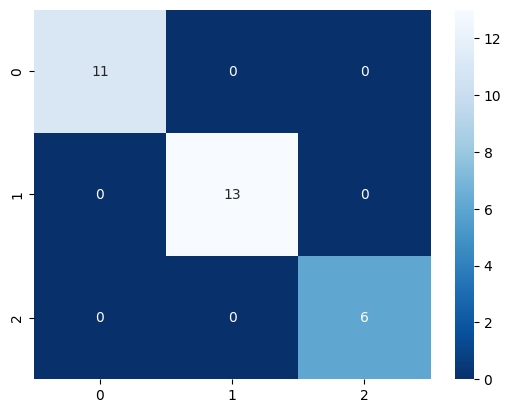

In [60]:
print(df['species'].value_counts())
print('score ',modelo.score(xtest, ytest))

print("recall_score ", recall_score(prediccion, ytest, average='micro'))
print("accuracy_score ", accuracy_score(prediccion, ytest))
print("f1_score ", f1_score(prediccion, ytest, average='micro'))
print("confusion_matrix ", confusion_matrix(prediccion, ytest))
print("classification_report ", classification_report(prediccion, ytest))


cf = confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')